Force free magnetic fields are defined as magnetic fields without Lorentz force

$$
\begin{align*}
\mathbf{J} \times \mathbf{B} & = \mathbf{0} \\
\nabla \cdot \mathbf{B} & = 0
\end{align*}
$$

In magnetohydrodynamics (MHD), the current density $\mathbf{J}$ is given by (in SI units)

$$
\mathbf{J} = \frac{1}{\mu_0} \nabla \times \mathbf{B}
$$


Therefore, force free magnetic fields are determined by the following partial differential equations (PDEs)

$$
\begin{align*}
\mathbf{(\nabla \times \mathbf{B})} \times \mathbf{B} & = \mathbf{0} \\
\nabla \cdot \mathbf{B} & = 0
\end{align*}
$$

The analytical solution of these PDEs in a general case is unknown. But @low1990modeling shows that we can calculate "axisymmetric" force free fields. If we rotate the plane perpendicular to the axis of symmetry, we can generate a quite general force free fields. In this post, I try to calculate this Low and Lou fields, referencing [this code](https://github.com/RobertJaro/NF2). 

## Low-Lou ODE

To calculate Low and Lou fields, we have to solve the following ordinary differential equation (ODE).

$$\begin{cases}
\displaystyle (1-\mu^2)\frac{d^2 P}{d\mu^2} + n(n+1)P + a^2 \frac{1+n}{n}P^{1 + \frac{2}{n}} = 0 \\
\mu = \cos\theta \in [-1, 1] \\ 
P(-1) = 0 \\
P(1) = 0 \\
\\
P'(-1) = 10 \text{ for numerical normalization}
\end{cases}
$$

For fixed $n$, $a$ serves as a eignvalue for this homogenous BVP.

For $n=1$, we can list the positive eigenvalues in ascending order with $m=0, 1, 2, ...$. 

We denote a eigenvalue as $a^2 _{n, m}$ and the corresponding eigenfunction as $P_{n, m}$.

For $n=1, m=0, 1, 2$, 

$$
\begin{align}
a^2 _{1, 0} &= 0 \\
a^2 _{1, 1} &= 0.425 \\
a^2 _{1, 2} &= 2.55 \\
\end{align}
$$

If you carefully see the Figure 1 by @low1990modeling, we can notice that

$$P_{1,0} (\mu) \sim \cos\left(\displaystyle\frac{\pi}{2} \mu\right)$$

$$P_{1,1} (\mu) \sim -\sin\left(\displaystyle\pi \mu\right)$$

$$P_{1,2} (\mu) \sim -\cos\left(\displaystyle\frac{3\pi}{2} \mu\right)$$

Then we can generally say that

For $m=0, 2$ (even $m$)

$$P_{1,m} (\mu) \sim \cos\left(\displaystyle\frac{(m + 1)\pi}{2} \mu\right)$$

For $m=1$ (odd $m$)
$$P_{1,m} (\mu) \sim \sin\left(\displaystyle\frac{(m + 1)\pi}{2} \mu\right)$$

This is the initial guess of the solution.

### Rewrite Low-Lou ODE using $\mathbf{S}(\mu)$

$$
(1-\mu^2)P'' + n(n+1)P + a^2 \frac{1+n}{n}P^{1 + \frac{2}{n}} = 0
$$

$$
\rightarrow P'' =  \frac{1}{1-\mu^2}\left[- n(n+1)P - a^2 \frac{1+n}{n}P^{1 + \frac{2}{n}}\right]
$$

$$
\rightarrow P'' =  \frac{-1}{1-\mu^2 + \epsilon}\left[n(n+1)P + a^2 \frac{1+n}{n}P^{1 + \frac{2}{n}}\right]
$$

where $\epsilon = 10^{-6}$ for numerical stability.

Target `y`
$$
\mathbf{S}(\mu) = \begin{bmatrix}
                     P(\mu) \\
                     P'(\mu)
                 \end{bmatrix}
              = \begin{bmatrix}
                     y[0] \\
                     y[1]
                 \end{bmatrix}
$$

ODE system `F(x, y)`
$$
\frac{d\mathbf{S}}{d\mu} = \mathbf{F}(\mu, \mathbf{S}(\mu)) 
                         = \begin{bmatrix}
                             P'(\mu) \\
                             P''(\mu)
                           \end{bmatrix}
                         = \begin{bmatrix}
                             y[1] \\
                            \displaystyle \frac{-1}{1-\mu^2 + \epsilon}\left[n(n+1)P + a^2 \frac{1+n}{n}P^{1 + \frac{2}{n}}\right]
                           \end{bmatrix}   
$$

$$\begin{cases}
\mu = \cos\theta \in [-1, 1] \\ 
P(-1) = 0 \\
P(1) = 0 \\
\end{cases}
$$

$$
P'(-1) = 10
$$

Domain

```python
mu_span = [-1, 1]
N = 100 # number of points
mu = np.linspace(mu_span[0], mu_span[1], N)
```

Boundary condition function `bc` defined from `ya`, `yb`

$$
\text{ya} = \mathbf{S}(-1) = \begin{bmatrix}
                                 P(-1) \\
                                 P'(-1)
                             \end{bmatrix}
                          = \begin{bmatrix}
                                 0 \\
                                 10
                             \end{bmatrix}
                          = \begin{bmatrix}
                                 \text{ya}[0] \\
                                 \text{ya}[1]
                             \end{bmatrix}
$$

$$
\text{yb} = \mathbf{S}(1) = \begin{bmatrix}
                                 P(1) \\
                                 P'(1)
                             \end{bmatrix}
                            = \begin{bmatrix}
                                 0 \\
                                 ?
                              \end{bmatrix}
                            = \begin{bmatrix}
                                 \text{yb}[0] \\
                                 \text{yb}[1]
                              \end{bmatrix}
$$

$$
\text{bc} = \begin{bmatrix}
                 \text{ya} - \mathbf{S}(-1) \\
                 \text{yb} - \mathbf{S}(1)
            \end{bmatrix}
          = \begin{bmatrix}
                 \text{ya}[0] - 0 \\
                 \text{ya}[1] - 10 \\
                 \text{yb}[0] - 0
            \end{bmatrix}
          = \begin{bmatrix}
                 \text{ya}[0] \\
                 \text{ya}[1] - 10\\
                 \text{yb}[0]
            \end{bmatrix}
$$

Initial guess `y0`

For the given spacing `h`, 

$$
\begin{align}
\text{y0} & = [\mathbf{S}(-1), \mathbf{S}(-1 + h), \mathbf{S}(-1 + 2h), \cdots, \mathbf{S}(1)] \\
          & = \begin{bmatrix}
                  P(\mu=-1) & P(\mu=-1+h) & P(\mu=-1+2h) & \cdots & P(\mu=1) \\ 
                  P'(\mu=-1) & P'(\mu=-1+h) & P'(\mu=-1+2h) & \cdots & P'(\mu=1) \\ 
               \end{bmatrix}
\end{align}
$$

For $m=0, 2$ (even $m$)

$$P_{1,m} (\mu) \sim \cos\left(\displaystyle\frac{(m + 1)\pi}{2} \mu\right)$$

For $m=1$ (odd $m$)
$$P_{1,m} (\mu) \sim \sin\left(\displaystyle\frac{(m + 1)\pi}{2} \mu\right)$$

```python
if m % 2 == 0:
    P_init = np.cos(mu * (m + 1) * np.pi / 2)
else:
    P_init = np.sin(mu * (m + 1) * np.pi / 2)
```

Since $P'(-1) = 10$,

```python
dP_init = 10*np.ones_like(mu)
```

Then, together,

```python
S_init = np.vstack([P_init, dP_init])
```

In [ ]:
import numpy as np 
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt 

In [ ]:
def find_P_and_a2(n, m):

    # ODE system
    # Define BVP (Low and Lou 1990)
    # a2 -> eigenvalue
    # S = [P, dP/dmu]
    # F = dSdmu
    # 
    # dP/dmu = 10 at mu = -1
    def F(x, y, p):
        mu = x
        P = y[0]
        dP = y[1]
        a2 = p[0]

        ddP = (-1)*(n*(n+1)*P + a2*((1+n)/n)*P**(1+2/n)) / (1-mu**2 + 1e-6)

        return [dP, ddP] 

    # Boundary Condition
    def bc(ya, yb, p):
        return [ya[0], ya[1]-10, yb[0]]

    # Domain
    mu_span = [-1, 1]
    N = 100
    mu = np.linspace(mu_span[0], mu_span[1], N)

    # Initial guess
    # For given m, use different initial guess
    if m % 2 == 0:
        P_guess = np.cos(mu * (m + 1) * np.pi / 2)
    else:
        P_guess = np.sin(mu * (m + 1) * np.pi / 2)

    # For initial guess of dP/dmu, just use BC value
    dP_guess = 10*np.ones_like(mu)

    y_guess = np.vstack([P_guess, dP_guess])

    # For each initial eigenvalue, solve the problem.
    # If it is successful, return that otherwise do not return.
    # np.vectorize -> for loop & return type : array
    @np.vectorize
    def solve_eigenvalue_problem(a2_0):
        sol = solve_bvp(F, bc, mu, y_guess, p=[a2_0], tol=1e-6)
        if sol.success == True:
            return sol
        else:
            return None 

    a2_0_list = np.linspace(0.0, 10.0, 100)

    results = solve_eigenvalue_problem(a2_0_list)
    eigenvalues = np.array([sol.p for sol in results if sol is not None])


     # round & unique value & sorting
    eigenvalues = np.sort(np.unique(np.round(eigenvalues, 4)))
    
    # The smallest value for given m is desired eigenvalue
    eigenvalue = eigenvalues[0]
    # If this eigenvalue is zero for nonzero m, choose the next big eigenvalue
    if m > 0:
        if not (eigenvalue > 0):
            eigenvalue = eigenvalues[1]

    # Solve again with that eigenvalue
    sol = solve_eigenvalue_problem([eigenvalue])[0]
    
    return sol.sol, sol.p[0]

<matplotlib.legend.Legend>

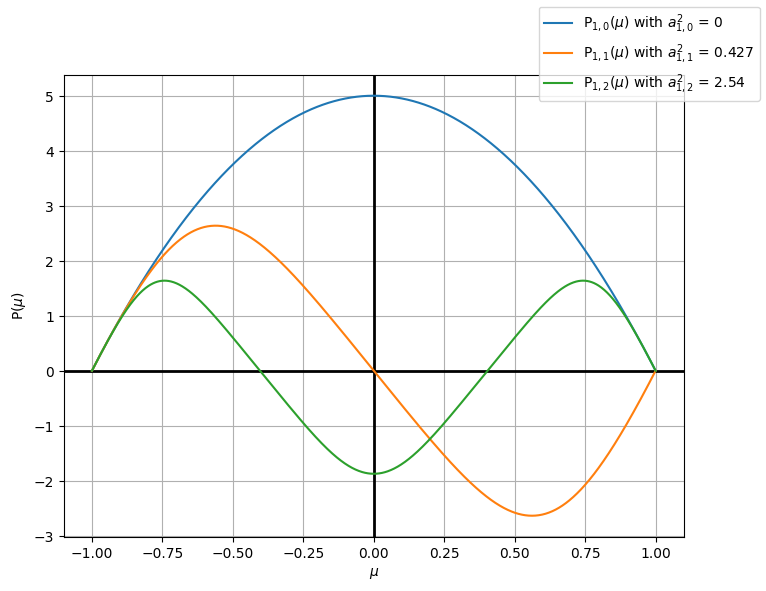

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(True)
ax.axhline(0, color='k', lw=2)
ax.axvline(0, color='k', lw=2)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'P($\mu$)')

mu_plot = np.linspace(-1, 1, 1000)

n = 1
for m in [0, 1, 2]:
    
    S, a2 = find_P_and_a2(n, m)
    P_plot = S(mu_plot)[0]
    
    if a2 < 1e-3:
        P_label = 'P' r'$_{' f'{n}, {m}' r'}(\mu)$ with $a^2' r'_{' f'{n}, {m}' r'}$ = 0'
    else:
        P_label = 'P' r'$_{' f'{n}, {m}' r'}(\mu)$ with $a^2' r'_{' f'{n}, {m}' r'}$ = ' f'{a2:.3g}'
    ax.plot(mu_plot, P_plot, label=P_label)

fig.legend()

We successfuly solve Low-Lou ODE for $n=1, m=0, 1, 2$. (see Figure 1 by @low1990modeling)

## Parameters

### `bounds`
`bounds=[x_min, x_max, y_min, y_max, z_min, z_max]`

### `resolutions`
`resolutions=[Nx, Ny, Nz]` where `Nx`, `Ny`, `Nz` respectively mean that the number of points in x-, y-, z-axis.

### $n$ & $m$

$P_{n,m}(\mu)$ & $a^2 _{n,m}$ are eigenfunction and eigenvalues for Low-Lou ODE with fixed $n$. And $m$ is just used for denoting differenct eigenfunction and eigenvalues.

$$
\displaystyle (1-\mu^2)\frac{d^2 P_{n,m}}{d\mu^2} + n(n+1)P_{n,m} + a^2 _{n,m} \frac{1+n}{n}P_{n,m}^{1 + \frac{2}{n}} = 0
$$

### $l$ & $\Phi$

See Figure 2 by @low1990modeling

## Algorithm

For each physical coordinate $(x, y, z)$, 

Calculate corresponding

1. local Cartesian coordinate $(X, Y, Z)$
2. local spherical coordinate $(r, \theta, \phi)$
3. $\mu = \cos\theta$
4. $P'_{n,m}(\mu)$ and $P_{n,m}(\mu)$ by solving Low-Lou ODE
5. $(B_r, B_\theta, B_\phi)$
6. $(B_X, B_Y, B_Z)$
7. $(B_x, B_y, B_z)$

Then, we get a vector $(B_x, B_y, B_z)$ at the point $(x, y, z)$

The local spherical coordinates are

$$r = \sqrt{X^2 + Y^2 + Z^2}$$

$$\theta= \arccos\frac{Z}{r}$$

$$\phi = \arctan2\frac{Y}{X}$$

`S` refers to  $\mathbf{S}_{n,m}(\mu)$ and `a2` refers to $a^2 _{n,m}$

$$
\mathbf{S}_{n,m}(\mu) = \begin{bmatrix}
                     P_{n,m}(\mu) \\
                     P'_{n,m}(\mu)
                 \end{bmatrix}
$$

The magnetic field is

$$
\mathbf{B}(r, \theta, \phi) = B_r \hat{r} + B_\theta \hat{\theta} + B_\phi \hat{\phi}
$$

where

$$
B_r = \frac{1}{r^2 \sin\theta} \frac{\partial A}{\partial \theta}
$$

$$
B_\theta = -\frac{1}{r \sin\theta} \frac{\partial A}{\partial r}
$$

$$
B_\phi = \frac{Q}{r \sin\theta}
$$

Here $A$ is

$$
A = (r^{-n})P_{n,m}(\mu)
$$

$$
\frac{\partial A}{\partial \theta} = (- r^{-n}\sin\theta) P'_{n,m}(\mu)
$$

$$
\frac{\partial A}{\partial r} = (-n r^{-n-1}) P_{n,m}(\mu) 
$$

For $n=1$,

$$
Q(A) = \sqrt{a^2 _{n,m}} A^{1 + \frac{1}{n}}
$$

$$
\alpha = \sqrt{a^2 _{n,m}} \left(1 + \frac{1}{n} \right) A^{\frac{1}{n}}
$$

In [ ]:
import pyvista as pv
pv.set_jupyter_backend('static')
pv.global_theme.notebook = True
pv.start_xvfb()

In [ ]:
class LowLouMag:
    "A Low and Lou (1990) NLFFF"

    
    def __init__(self, 
                 bounds=[-1,1,-1,1,0,2],
                 resolutions=[64,64,64],
                 n=1, m=1,
                 l=0.3, Phi=np.pi/2):
        self.bounds = bounds
        self.resolutions = resolutions
        self.n = n
        self.m = m
        self.l = l
        self.Phi = Phi
        

    def __str__(self): 
        return (
            "### Low and Lou (1990) NLFFF\n"
            f"bounds = {self.bounds}<br>\n"
            f"resolutions = {self.resolutions}<br>\n"
            f"n = {self.n}<br>\n"
            f"m = {self.m}<br>\n"
            f"l = {self.l}<br>\n"
            f"Phi = {self.Phi/np.pi}π<br>\n"
        )
    _repr_markdown_ = __str__


    def create_physical_coordinates(self):
        x_1D = np.linspace(self.bounds[0], self.bounds[1], self.resolutions[0])
        y_1D = np.linspace(self.bounds[2], self.bounds[3], self.resolutions[1])
        z_1D = np.linspace(self.bounds[4], self.bounds[5], self.resolutions[2])
        x_spacing = np.diff(x_1D)[0]
        y_spacing = np.diff(y_1D)[0]
        z_spacing = np.diff(z_1D)[0]
        spacing = (x_spacing, y_spacing, z_spacing)
        origin = (x_1D[0], y_1D[0], z_1D[0]) # The bottom left corner of the data set
        self.grid = pv.ImageData(dimensions=self.resolutions, spacing=spacing, origin=origin)
        self.x_1D = x_1D
        self.y_1D = y_1D
        self.z_1D = z_1D
        return self.grid
    

    def calculate_local_Cartesian_coordinates(self):
        # information of point source & Z-axis
        l = self.l
        Phi = self.Phi
        
        # physical coordinates (x, y, z)
        x = self.grid.x
        y = self.grid.y
        z = self.grid.z

        # local Cartesian coordinates (X, Y, Z)
        X = x*np.cos(Phi) - (z+l)*np.sin(Phi)
        Y = y
        Z = x*np.sin(Phi) + (z+l)*np.cos(Phi)

        self.X, self.Y, self.Z = X, Y, Z


    def calculate_local_spherical_coordinates(self):
        # local Cartesian coordinates (X, Y, Z)
        X = self.X
        Y = self.Y
        Z = self.Z

        # local spherical coordinates (r, theta, phi)
        r = np.sqrt(X**2 + Y**2 + Z**2)
        theta = np.arccos(Z/r)
        phi = np.arctan2(Y, X) 

        self.r, self.theta, self.phi = r, theta, phi


    def calculate_eigenfunctions(self):
        # calculate mu=cos(theta)
        mu = np.cos(self.theta)

        # eigenfunction parameter n, m
        n = self.n
        m = self.m

        # calculate eigenfunction & its derivates and eigenvalues
        # S = [P, dP]
        S, a2 = find_P_and_a2(n, m)
        P, dP = S(mu)

        self.P, self.dP, self.a2 = P, dP, a2


    def calculate_local_spherical_magnetic_fields(self):
        # eigenfunctions and eigenvalue
        n, m = self.n, self.m
        P, dP, a2 = self.P, self.dP, self.a2

        # r, theta info
        r, theta = self.r, self.theta
        
        A = (r**(-n)) * P
        dA_dtheta = -(r**(-n)) * np.sin(theta) * dP
        dA_dr = -(n*(r**(-n-1))) * P
        Q = np.sqrt(a2) * A * np.abs(A)**(1/n)
        
        alpha = np.sqrt(a2) * (1 + 1/n) * A**(1/n)
        
        Br = (r**2 * np.sin(theta))**(-1) * dA_dtheta
        Btheta = -1 * (r*np.sin(theta))**(-1) * dA_dr
        Bphi = (r*np.sin(theta))**(-1) * Q
        
        self.Br, self.Btheta, self.Bphi, self.alpha = Br, Btheta, Bphi, alpha


    def calculate_local_Cartesian_magnetic_fields(self):
        Br, Btheta, Bphi = self.Br, self.Btheta, self.Bphi
        r, theta, phi = self.r, self.theta, self.phi
        
        BX = Br * np.sin(theta) * np.cos(phi) + Btheta * np.cos(theta) * np.cos(phi) - Bphi * np.sin(phi)
        BY = Br * np.sin(theta) * np.sin(phi) + Btheta * np.cos(theta) * np.sin(phi) + Bphi * np.cos(phi)
        BZ = Br * np.cos(theta) - Bphi * np.sin(theta)
        
        self.BX, self.BY, self.BZ = BX, BY, BZ


    def calculate_physical_magnetic_fields(self):
        BX, BY, BZ = self.BX, self.BY, self.BZ
        Phi = self.Phi

        Bx = BX * np.cos(Phi) + BZ * np.sin(Phi)
        By = BY
        Bz = - BX * np.sin(Phi) + BZ * np.cos(Phi)
        
        self.Bx, self.By, self.Bz = Bx, By, Bz

    def calculate_final_magnetic_fields(self):
        bx = self.Bx.reshape(self.resolutions).transpose(2, 1, 0)
        by = self.By.reshape(self.resolutions).transpose(2, 1, 0)
        bz = self.Bz.reshape(self.resolutions).transpose(2, 1, 0)
        return bx, by, bz

    ##------ All in one ------##
    def calculate(self):
        self.create_physical_coordinates()
        self.calculate_local_Cartesian_coordinates()
        self.calculate_local_spherical_coordinates()
        self.calculate_eigenfunctions()
        self.calculate_local_spherical_magnetic_fields()
        self.calculate_local_Cartesian_magnetic_fields()
        self.calculate_physical_magnetic_fields()
        bx, by, bz = self.calculate_final_magnetic_fields()
        return bx, by, bz

In [ ]:
b = LowLouMag()
b

### Low and Lou (1990) NLFFF
bounds = [-1, 1, -1, 1, 0, 2]<br>
resolutions = [64, 64, 64]<br>
n = 1<br>
m = 1<br>
l = 0.3<br>
Phi = 0.5π<br>


In [ ]:
b.create_physical_coordinates()

ImageData,Information
N Cells,250047
N Points,262144
X Bounds,"-1.000e+00, 1.000e+00"
Y Bounds,"-1.000e+00, 1.000e+00"
Z Bounds,"0.000e+00, 2.000e+00"
Dimensions,"64, 64, 64"
Spacing,"3.175e-02, 3.175e-02, 3.175e-02"
N Arrays,0


In [ ]:
b.calculate_local_Cartesian_coordinates()

In [ ]:
b.grid.x[0], b.grid.y[0], b.grid.z[0]

(-1.0, -1.0, 0.0)

In [ ]:
b.X[0], b.Y[0], b.Z[0]

(-0.30000000000000004, -1.0, -1.0)

In [ ]:
b.calculate_local_spherical_coordinates()

In [ ]:
b.r[0], b.theta[0], b.phi[0]

(1.445683229480096, 2.3346567297775978, -1.8622531212727638)

In [ ]:
b.calculate_eigenfunctions()

In [ ]:
b.P[0], b.dP[0], b.a2

(2.3671821639686197, 4.145376627987454, 0.4274037235234833)

In [ ]:
b.calculate_local_spherical_magnetic_fields()

In [ ]:
b.Br[0], b.Btheta[0], b.Bphi[0], b.alpha[0]

(-1.3719698429432043,
 1.0848561237109233,
 1.6788928338597737,
 2.140955710310132)

In [ ]:
b.calculate_local_Cartesian_magnetic_fields()

In [ ]:
b.BX[0], b.BY[0], b.BZ[0]

(2.108420021547058, 1.185348144787035, -0.26343650351723624)

In [ ]:
b.calculate_physical_magnetic_fields()

In [ ]:
b.Bx[0], b.By[0], b.Bz[0]

(-0.26343650351723613, 1.185348144787035, -2.108420021547058)

In [ ]:
bx, by, bz = b.calculate_final_magnetic_fields()

In [ ]:
!pip install -q git+https://github.com/mgjeon/magnetic_field_line.git

In [ ]:
from magplot.base import create_mesh, mag_plotter

In [ ]:
mesh = create_mesh(bx, by, bz)

In [ ]:
b_plot = mag_plotter(mesh)
b_tube, b_bottom, b_dargs = b_plot.create_mesh(i_siz=32, j_siz=32, 
                                               i_resolution=8, j_resolution=8, 
                                               vmin=-100, vmax=100, 
                                               max_time=10000)

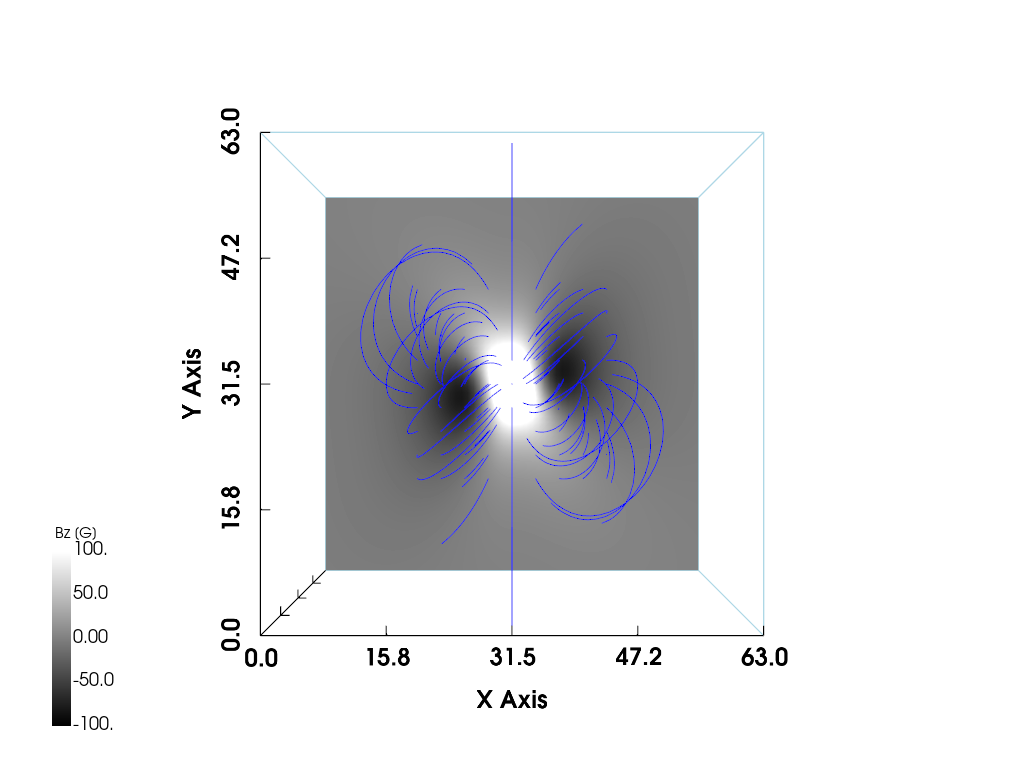

In [ ]:
p = pv.Plotter()
p.add_mesh(b_plot.grid.outline())
p.add_mesh(b_bottom, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera_position = 'xy'
p.show_bounds()
p.show()

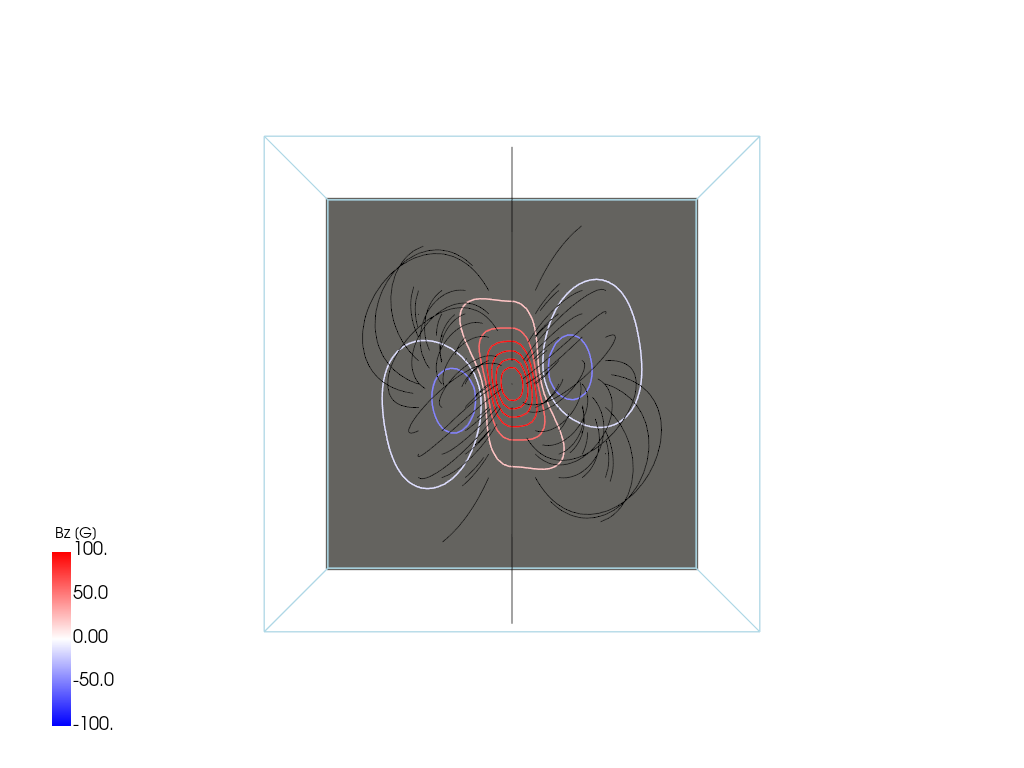

In [ ]:
p = pv.Plotter(off_screen=False)
p.add_mesh(b_plot.grid.outline())
p.add_mesh(pv.Plane(center=(mesh.center[0], mesh.center[1], -1), direction=(0, 0, 1), i_size=64, j_size=64), color='gray')
p.add_mesh(b_bottom.contour(scalars=b_bottom['vector'][:, 2]), cmap='bwr', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='black')
p.camera_position = 'xy'
p.show()

It seems to correspond to Figure 8, not Figure 3. I don't know why.

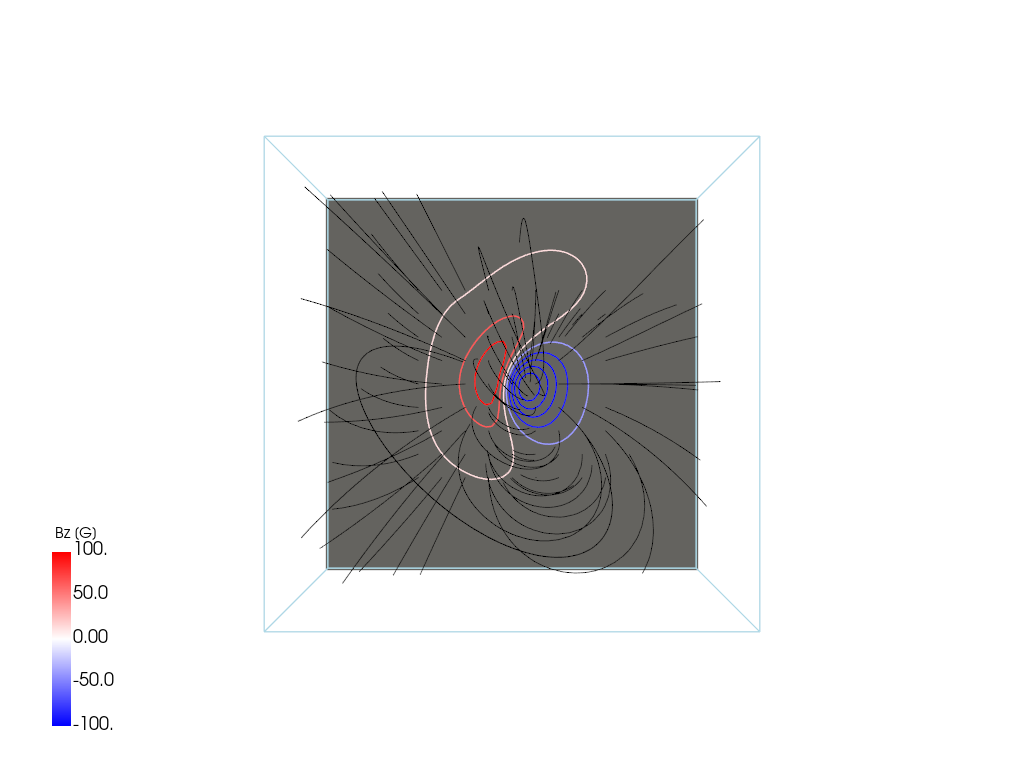

In [ ]:
mesh_new = create_mesh(*LowLouMag(Phi=np.pi/4).calculate()).reflect((0, 1, 0))

b_plot_new = mag_plotter(mesh_new)
b_tube_new, b_bottom_new, b_dargs_new = b_plot_new.create_mesh(i_siz=32, j_siz=32, 
                                                   i_resolution=8, j_resolution=8, 
                                                   vmin=-100, vmax=100, 
                                                   max_time=10000)

p = pv.Plotter(off_screen=False)
p.add_mesh(b_plot_new.grid.outline())
p.add_mesh(pv.Plane(center=(mesh_new.center[0], mesh_new.center[1], -1), direction=(0, 0, 1), i_size=64, j_size=64), color='gray')
p.add_mesh(b_bottom_new.contour(scalars=b_bottom_new['vector'][:, 2]), cmap='bwr', **b_dargs_new)
p.add_mesh(b_tube_new, lighting=False, color='black')
p.camera_position = 'xy'
p.show()

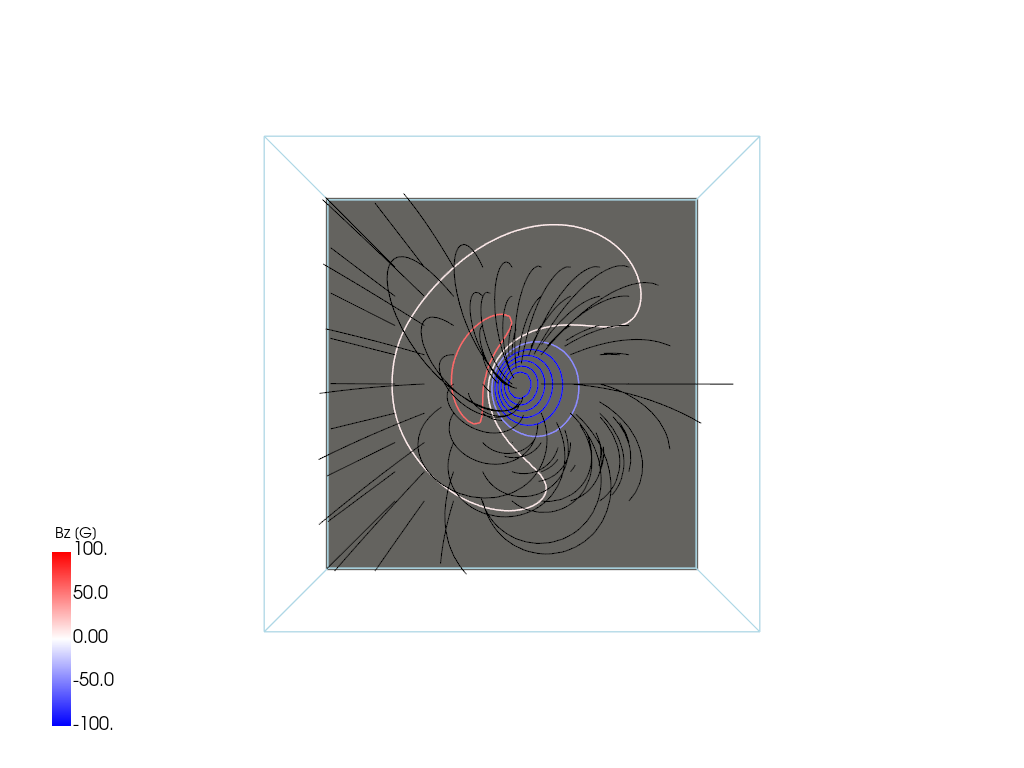

In [ ]:
mesh_new = create_mesh(*LowLouMag(Phi=0.47).calculate()).reflect((0, 1, 0))

b_plot_new = mag_plotter(mesh_new)
b_tube_new, b_bottom_new, b_dargs_new = b_plot_new.create_mesh(i_siz=40, j_siz=40, 
                                                   i_resolution=8, j_resolution=8, 
                                                   vmin=-100, vmax=100, 
                                                   max_time=10000)

p = pv.Plotter(off_screen=False)
p.add_mesh(b_plot_new.grid.outline())
p.add_mesh(pv.Plane(center=(mesh_new.center[0], mesh_new.center[1], -1), direction=(0, 0, 1), i_size=64, j_size=64), color='gray')
p.add_mesh(b_bottom_new.contour(scalars=b_bottom_new['vector'][:, 2]), cmap='bwr', **b_dargs_new)
p.add_mesh(b_tube_new, lighting=False, color='black')
p.camera_position = 'xy'
p.show()

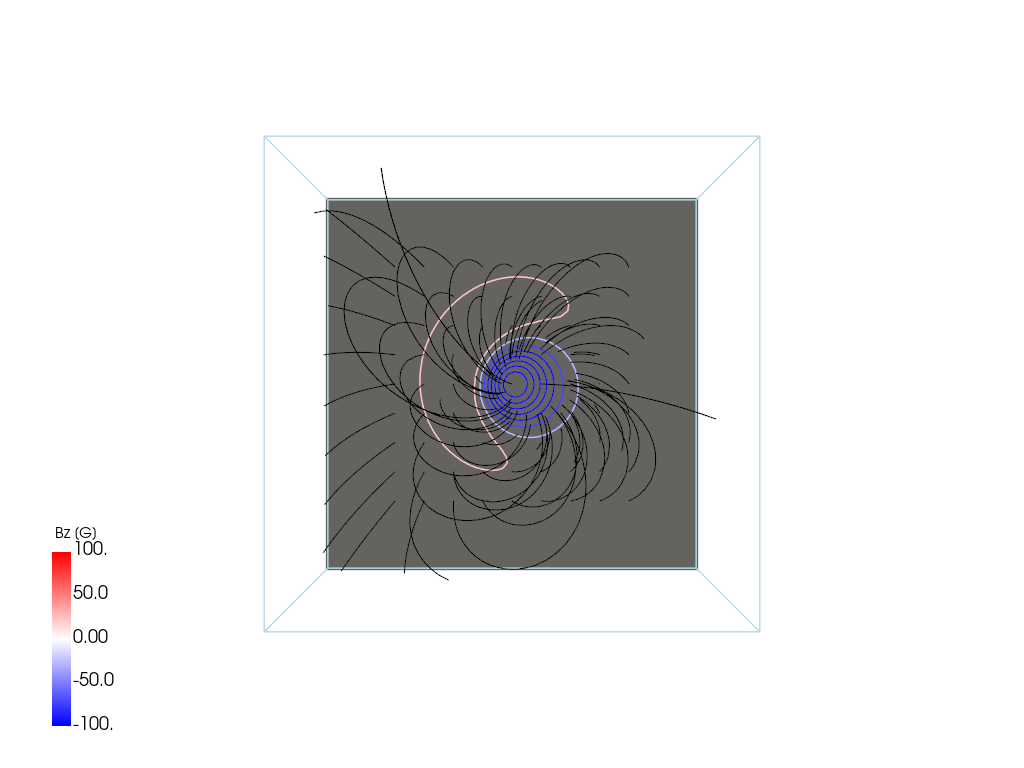

In [ ]:
mesh_new = create_mesh(*LowLouMag(Phi=0.27).calculate()).reflect((0, 1, 0))

b_plot_new = mag_plotter(mesh_new)
b_tube_new, b_bottom_new, b_dargs_new = b_plot_new.create_mesh(i_siz=40, j_siz=40, 
                                                   i_resolution=8, j_resolution=8, 
                                                   vmin=-100, vmax=100, 
                                                   max_time=10000)

p = pv.Plotter(off_screen=False)
p.add_mesh(b_plot_new.grid.outline())
p.add_mesh(pv.Plane(center=(mesh_new.center[0], mesh_new.center[1], -1), direction=(0, 0, 1), i_size=64, j_size=64), color='gray')
p.add_mesh(b_bottom_new.contour(scalars=b_bottom_new['vector'][:, 2]), cmap='bwr', **b_dargs_new)
p.add_mesh(b_tube_new, lighting=False, color='black')
p.camera_position = 'xy'
p.show()

With `reflect((0, 1, 0))`, these seems to correspond to Figure 4, 5, and 6, respectively. However, I don't know why I need to use `reflect((0, 1, 0))`.